<h1 style = "color:#C3447A">CARBON EMMISSIONS IMPACT ANALYSIS</h1>


<h3 style = "color:#005871">--> importing the necessary Python libraries and the dataset</h3>

In [5]:
import pandas as pd 

# loading the datasets 
temp_data = pd.read_csv("E:/python_cybrom/Carbon Emissions Wordwide/temperature.csv")

carbon_data = pd.read_csv("E:/python_cybrom/Carbon Emissions Wordwide/carbon_emmission.csv")

In [6]:
temp_data.head()

,ObjectId,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,0.736,0.112,-0.752,0.308,-0.490,0.415,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [7]:
carbon_data.head()

,ObjectId,Country,Date,Value
0,1,World,1958M03,315.70
1,2,World,1958M04,317.45
2,3,World,1958M05,317.51
3,4,World,1958M06,317.24
4,5,World,1958M07,315.86


In [10]:
temp_data.shape

(225, 66)

In [8]:
carbon_data.shape

(1570, 4)

<h3 style = "color:#005871">--> Selecting and computing statistics</h3>

In [9]:
# for temprature dataset
temperature_values = temp_data.filter(regex= '^F').stack()  #extracting all year columns and Combine them into one single Series 
                                                            #where column names become part of the index
temperature_stats = {
    "Mean" : temperature_values.mean(),
    "Median" : temperature_values.median(), 
    "Varince" : temperature_values.var()
}

# for co2 dataset 
co2_values= carbon_data['Value']

co2_stats = {
    "Mean" : co2_values.mean(),
    "Median" : co2_values.median(),
    "Varience" : co2_values.var()
}

temperature_stats, co2_stats

({'Mean': 0.5377713483146068, 'Median': 0.47, 'Varince': 0.4294524831504378},
 {'Mean': 180.71615286624203,
  'Median': 313.835,
  'Varience': 32600.00200469294})

In [17]:
# Temperature: calculate yearly average
# Assuming the temperature columns are like 'F2020', 'F2021', ...
temperature_years = temp_data.filter(regex='^F').mean(axis=0)
temperature_years.index = temperature_years.index.str.replace('F', '').astype(int)


In [20]:
# Carbon: extract Year from 'Date' (format '1958M03') and compute yearly average
carbon_data['Year'] = carbon_data['Date'].str[:4].astype(int)
co2_yearly = carbon_data.groupby('Year')['Value'].mean()

In [21]:
# Combine datasets into one DataFrame
merged_data = pd.DataFrame({
    "Temperature Change": temperature_years,
    "CO₂ Concentration": co2_yearly
}).dropna()

print("\nMerged Data Sample:")
print(merged_data.head())


Merged Data Sample:
      Temperature Change  CO₂ Concentration
1961            0.163053         158.938333
1962           -0.013476         159.355000
1963           -0.006043         159.580417
1964           -0.070059         159.905833
1965           -0.247027         160.083333


<h3 style = "color:#005871">--> 1️⃣ Line Chart: Temperature & CO₂ over time</h3>

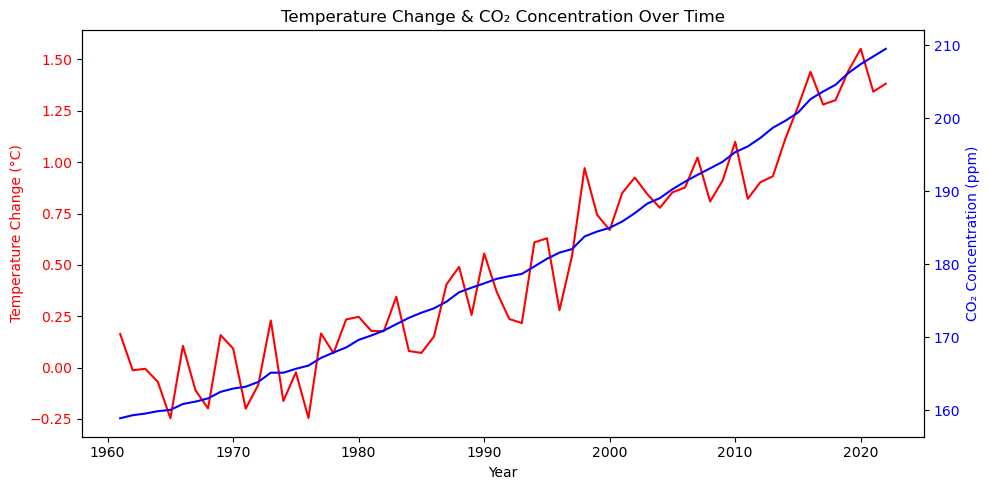

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(merged_data.index, merged_data['Temperature Change'], color='red', label='Temperature Change (°C)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature Change (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['CO₂ Concentration'], color='blue', label='CO₂ Concentration (ppm)')
ax2.set_ylabel('CO₂ Concentration (ppm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Temperature Change & CO₂ Concentration Over Time')
fig.tight_layout()
plt.show()

<h3 style = "color:#005871">--> 2️⃣ Scatter Plot: Correlation</h3>

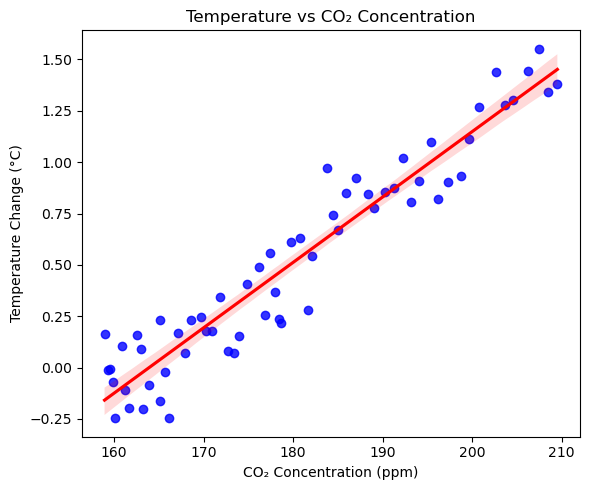

In [24]:
plt.figure(figsize=(6, 5))
sns.regplot(x='CO₂ Concentration', y='Temperature Change', data=merged_data,
            scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Temperature vs CO₂ Concentration')
plt.xlabel('CO₂ Concentration (ppm)')
plt.ylabel('Temperature Change (°C)')
plt.tight_layout()
plt.show()

<h3 style = "color:#005871">--> 3️⃣ Correlation Heatmap</h3>

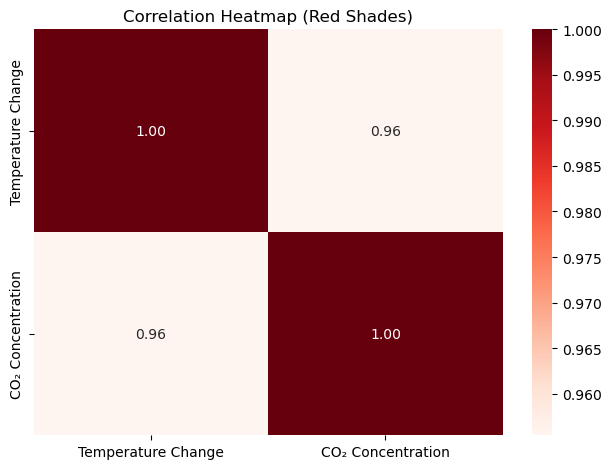

In [26]:
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
            cmap="Reds", cbar=True)
plt.title('Correlation Heatmap (Red Shades)')
plt.tight_layout()
plt.show()

<h3 style = "color:#005871">--> Dual Axis Area Chart</h3>

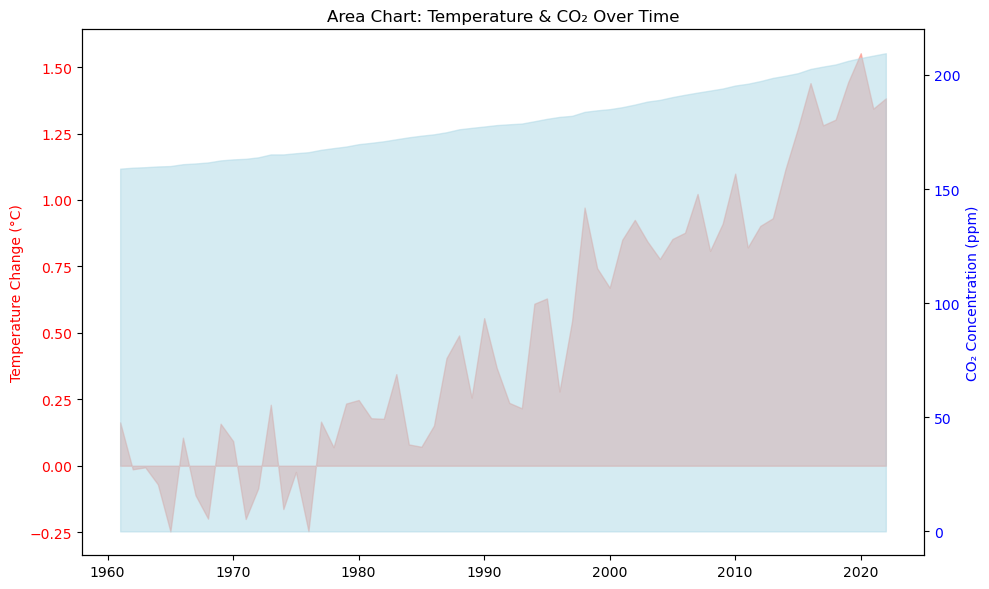

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.fill_between(merged_data.index, merged_data['Temperature Change'], color='salmon', alpha=0.5, label='Temperature Change')
ax1.set_ylabel('Temperature Change (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.fill_between(merged_data.index, merged_data['CO₂ Concentration'], color='lightblue', alpha=0.5, label='CO₂ Concentration')
ax2.set_ylabel('CO₂ Concentration (ppm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Area Chart: Temperature & CO₂ Over Time')
plt.tight_layout()
plt.show()


<h3 style = "color:#005871">--> Pairplot for Relationships</h3>

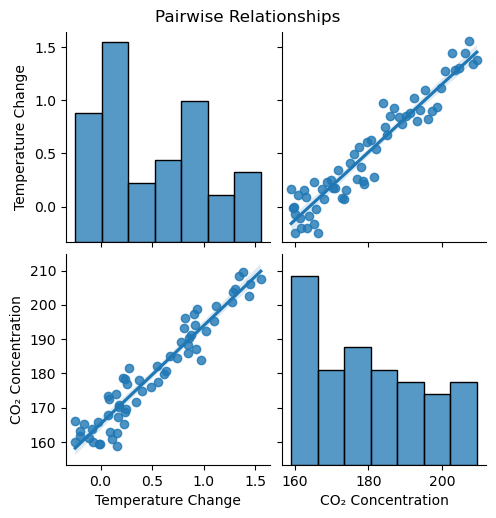

In [29]:
sns.pairplot(merged_data, kind='reg')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()
